In [143]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from PIL import Image


In [144]:
img1_grayscale = cv.imread('../Images/1/Car1.jpg',cv.IMREAD_GRAYSCALE)          # queryImage
img2_grayscale = cv.imread('../Images/1/Car2.jpg',cv.IMREAD_GRAYSCALE) # trainImage
# Initiate ORB detector
orb = cv.ORB_create()
# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1_grayscale,None)
kp2, des2 = orb.detectAndCompute(img2_grayscale,None)

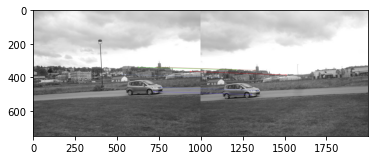

(<matplotlib.image.AxesImage at 0x1b400240df0>, None)

In [145]:
# create BFMatcher object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw 6 matches.
point_matches = [matches[0],matches[1],matches[19],matches[24],matches[25],matches[48]]
img3 = cv.drawMatches(img1_grayscale,kp1,img2_grayscale,kp2,point_matches,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

cv.imwrite('matching_6points.jpg', img3) 
plt.imshow(img3),plt.show()

In [146]:
list_kp1 = []
list_kp2 = []

# For each match...
for mat in point_matches:
    

    # Get the matching keypoints for each of the images
    img1_idx = mat.queryIdx
    img2_idx = mat.trainIdx

    # x - columns
    # y - rows
    # Get the coordinates
    (x1, y1) = kp1[img1_idx].pt
    (x2, y2) = kp2[img2_idx].pt
    print((x1, y1))
    # Append to each list
    list_kp1.append((x1, y1))
    list_kp2.append((x2, y2))

(761.4260864257812, 460.33929443359375)
(741.0, 339.0)
(532.915283203125, 383.6160583496094)
(721.6129760742188, 485.2225036621094)
(939.0, 365.0)
(630.0, 340.0)


In [147]:
img1 = cv.imread('../Images/1/Car1.jpg')
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
img2 = cv.imread('../Images/1/Car2.jpg') 
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


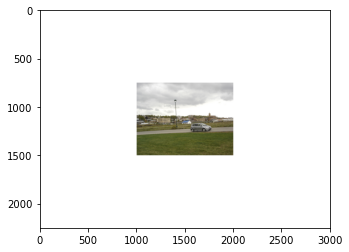

In [148]:
DUMMY = 256
stitched_result = np.full((img1.shape[0]+2*img2.shape[0]+1,img1.shape[1]+2*img1.shape[1]+1,img1.shape[2]) , fill_value=DUMMY , dtype=np.uint16)
stitched_result[img2.shape[0]:img2.shape[0]+img1.shape[0] ,img2.shape[1]:img2.shape[1]+img1.shape[1] , : ] = img1
image_x_lower_bound = img2.shape[1]
image_y_lower_bound = img2.shape[0]
image_x_higher_bound = img2.shape[1]+img1.shape[1]
image_y_higher_bound = img2.shape[0]+img1.shape[0]
plt.imshow(stitched_result) 

In [149]:
Ax = np.array([[1,list_kp2[i][0] ,list_kp2[i][1] , list_kp2[i][0]*list_kp2[i][1] ,list_kp2[i][0] ** 2 , list_kp2[i][1] ** 2 ] for i in range(6)])
x_in_first_image = np.array([list_kp1[i][0] for i in range(0,6)])
x_coefficients = np.linalg.solve(Ax,x_in_first_image)

# Ax = np.array([[1,list_kp2[i][0] ,list_kp2[i][1] , list_kp2[i][0]*list_kp2[i][1] ,int(list_kp2[i][0] ** 2) , int(list_kp2[i][1] ** 2) ] for i in range(6)])
y_in_first_image = np.array([list_kp1[i][1] for i in range(0,6)])
y_coefficients = np.linalg.solve(Ax,y_in_first_image)

In [150]:
print(Ax)

print(x_coefficients)
print(y_coefficients)

[[1.00000000e+00 3.43388245e+02 4.77757568e+02 1.64056333e+05
  1.17915487e+05 2.28252294e+05]
 [1.00000000e+00 3.25000000e+02 3.58000000e+02 1.16350000e+05
  1.05625000e+05 1.28164000e+05]
 [1.00000000e+00 1.09900818e+02 4.00204865e+02 4.39828419e+04
  1.20781898e+04 1.60163934e+05]
 [1.00000000e+00 3.03575104e+02 5.02640747e+02 1.52589217e+05
  9.21578436e+04 2.52647721e+05]
 [1.00000000e+00 5.11000000e+02 3.86000000e+02 1.97246000e+05
  2.61121000e+05 1.48996000e+05]
 [1.00000000e+00 2.13000000e+02 3.56000000e+02 7.58280000e+04
  4.53690000e+04 1.26736000e+05]]
[ 4.61676858e+02  8.48410286e-01 -1.28528663e-01  3.30502349e-05
  2.43504147e-04  1.56342965e-04]
[ 6.57995598e+01 -1.68056306e-01  7.15278692e-01  3.66372949e-04
  2.06691188e-05  2.10186164e-04]


In [151]:

for i in range(0,img2.shape[0]): # y
    for j in range(0,img2.shape[1]): # x
        x_stitched = int(x_coefficients[0]+(x_coefficients[1]*j)+(x_coefficients[2]*i)+(x_coefficients[3]*i*j) + (x_coefficients[4]*j*j) + (x_coefficients[5]*i*i))
        y_stitched = int(y_coefficients[0]+(y_coefficients[1]*j)+(y_coefficients[2]*i)+(y_coefficients[3]*i*j) + (y_coefficients[4]*j*j) + (y_coefficients[5]*i*i))
        x_stitched += img1.shape[1]
        y_stitched += img1.shape[0]
        if (x_stitched > image_x_higher_bound):
            image_x_higher_bound = x_stitched
        elif (x_stitched < image_x_lower_bound):
            image_x_lower_bound = x_stitched
        if (y_stitched > image_y_higher_bound):
            image_y_higher_bound = y_stitched
        elif (y_stitched < image_y_lower_bound):
            image_y_lower_bound = y_stitched
        
        stitched_result[y_stitched,x_stitched,:] = img2[i,j]

print("stitching done!")

stitching done!


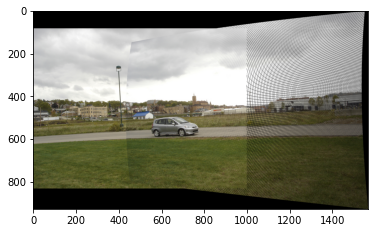

In [152]:
stitched_result = stitched_result[image_y_lower_bound:image_y_higher_bound , image_x_lower_bound: image_x_higher_bound]
plt.imshow(stitched_result.astype(np.uint8))
Image.fromarray(stitched_result.astype(np.uint8)).save('stitched_result_6points.png')

In [155]:
import copy
def neighbors(a,radius, rowNumber, columnNumber):
    result = a[rowNumber-radius:rowNumber+radius+1 ,columnNumber-radius:columnNumber+radius+1,:] 
    return result.reshape([result.shape[0]*result.shape[1],result.shape[2]])
def nearest_neaghbor_interpolation(img):
    found = False
    result = copy.deepcopy(img)
    for i in range(2,img.shape[0]):
        for j in range(2,img.shape[1]):
            if(img[i,j,0] == DUMMY):
                found = False
                for r in range(1,4):
                    for neighbor in neighbors(img,r,i,j):
                        if neighbor[0] != DUMMY:
                            result[i,j,:] = neighbor
                            found = True
                            break;
                    if found:
                        break;
                
    return result

In [156]:
interpolated = nearest_neaghbor_interpolation(stitched_result)

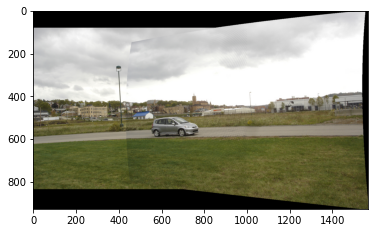

In [157]:
plt.imshow(interpolated.astype(np.uint8))
Image.fromarray(interpolated.astype(np.uint8)).save('stitched_result_6points_interpolated1.png')